# F Statistics
## F3 Statistics

F3 statistics are a useful analytical tool to understand population relationships. F3 statistics, just as F4 and F2 statistics measure allele frequency correlations between populations and were introduced by Nick Patterson in his [Patterson 2012](http://www.genetics.org/content/early/2012/09/06/genetics.112.145037).

F3 statistics are used for two purposes: i) as a test whether a target population (C) is admixed between two source populations (A and B), and ii) to measure shared drift between two test populations (A and B) from an outgroup (C).

F3 statistics are in both cases defined as the product of allele frequency differences between population C to A and B, respectively:

$$F3(A,B;C)=\langle(c−a)(c−b)\rangle$$

Here, $\langle\cdot\rangle$ denotes the average over all genotyped sites, and a, b and c
denote the allele frequency for a given site in the three populations A, B and C.

## Admixture F3 Statistics

It can be shown that if that statistics is negative, it provides unambiguous proof that population C is admixed between populations A and B, as in the following phylogeny (taken from Figure 1 from [Patterson 2012](http://www.genetics.org/content/early/2012/09/06/genetics.112.145037):

<img src="img/f3_phylogeny.png" alt="F3-phylogeny" style="width: 300px;"/>

Intuitively, an F3 statistics becomes negative if the allele frequency of the target population C is on average intermediate between the allele frequencies of A and B. Consider as an extreme example a genomic site where a=0, b=1 and c=0.5. Then we have (c−a)(c−b)=−0.25, which is negative. So if the entire statistics is negative, it suggests that in many positions, the allele frequency c is indeed intermediate, suggesting admixture between the two sources.

***Note:*** If an F3 statistics is *not* negative, it does *not* proof that there is no admixture!

We will use this statistics to test if Finnish are admixed between East and West, using different Eastern and Western sources. In the West, we use French, Icelandic, Lithuanian and Norwegian as source, and in the East we use Nganasan and one of the ancient individuals analysed in this workshop, *Bolshoy Oleni Ostrov*, 3500 year old individuals from the Northern Russian Kola-peninsula.

We use the software `qp3Pop` from [AdmixTools](https://github.com/DReichLab/AdmixTools), which similar to `smartpca` takes a parameter file:

    genotypename:   input genotype file (in eigenstrat format)
    snpname:        input snp file      (in eigenstrat format)
    indivname:      input indiv file    (in eigenstrat format)
    popfilename:    a file containing rows with three populations on each line A, B and C.
    inbreed: YES

Here, the last option is necessary if we are analysing pseudo-diploid ancient data (which is the case here).

To prepare the `popfilename`, create a new text file using Jupyter with the following content:

    Nganasan French Finnish
	Nganasan Icelandic Finnish
	Nganasan Lithuanian Finnish
	Nganasan Norwegian Finnish
	BolshoyOleniOstrov French Finnish
	BolshoyOleniOstrov Icelandic Finnish
	BolshoyOleniOstrov Lithuanian Finnish
	BolshoyOleniOstrov Norwegian Finnish

***Exercise:*** Prepare the parameter file with the input data as in the PCA session (see Principal Components Analysis (PCA)) and then run `qp3Pop -p PARAMETER_FILE`, where `PARAMETERFILE` should be replaced by your parameter file name. 

The results are in the output that you can view in the Notebook. The crucial bit should look like this:

	Source 1	Source 2	Target	f_3	std. err	Z	SNPs
	result:	Nganasan	French	Finnish	-0.004539	0.000510	-8.894	442567
	result:	Nganasan	Icelandic	Finnish	-0.005297	0.000563	-9.404	427954
	result:	Nganasan	Lithuanian	Finnish	-0.005062	0.000590	-8.574	426231
	result:	Nganasan	Norwegian	Finnish	-0.004744	0.000569	-8.332	428161
	result:	BolshoyOleniOstrov	French	Finnish	-0.002814	0.000444	-6.341	402958
	result:	BolshoyOleniOstrov	Icelandic	Finnish	-0.002590	0.000486	-5.323	386418
	result:	BolshoyOleniOstrov	Lithuanian	Finnish	-0.001523	0.000536	-2.840	384134
	result:	BolshoyOleniOstrov	Norwegian	Finnish	-0.001553	0.000502	-3.092	386203

This output shows as first three columns the three populations A, B (sources) and C (target). Then the f3 statistics, which is negative in all cases tested here, a standard error, a Z score and the number of SNPs involved in the statistics.

The Z score is key: It gives the deviation of the f3 statistic from zero in units of the standard error. As general rule, a Z score of -3 or more suggests a significant rejection of the Null hypothesis that the statistic is not negative. In this case, all of the statistics are significantly negative, proving that Finnish have ancestral admixture of East and West Eurasian ancestry. Note that the statistics does not suggest when this admixture happened!

## F4 Statistics

A different way to test for admixture is by “F4 statistics” (or “D statistics” which is very similar), also introduced in [Patterson 2012](http://www.genetics.org/content/early/2012/09/06/genetics.112.145037).

F4 statistics are also defined in terms of correlations of allele frequency differences, similarly to F3 statistics (see above), but involving four different populations, not just three. Specifically we define

$$F4(A,B;C,D)=\langle(a−b)(c−d)\rangle.$$

To understand the statistics, consider the following tree:

<img src="img/f4_phylogeny.png" alt="F4-phylogeny" style="width: 300px;"/>

In this tree, without any additional admixture, the allele frequency difference between A and B should be completely independent from the allele frequency difference between C and D. In that case, F4(A, B; C, D) should be zero, or at least not statistically different from zero. However, if there was gene flow from C or D into A or B, the statistic should be different from zero. Specifically, if the statistic is significantly negative, it implies gene flow between either C and B, or D and A. If it is significantly positive, it implies gene flow between A and C, or B and D.

The way this statistic is often used, is to put a divergent outgroup as population A, for which we know for sure that there was no admixture into either C or D. With this setup, we can then test for gene flow between B and D (if the statistic is positive), or B and C (if it is negative).

Here, we can use this statistic to test for East Asian admixture in Finns, similarly to the test using Admixture F3 statistics above. We will use the `qpDstat` program from [AdmixTools](https://github.com/DReichLab/AdmixTools) for that. We need to again prepare a population list file, this time with four populations (A, B, C, D). I suggest you open a new file and fill it with:

	Mbuti Nganasan French Finnish
	Mbuti Nganasan Icelandic Finnish
	Mbuti Nganasan Lithuanian Finnish
	Mbuti Nganasan Norwegian Finnish
	Mbuti BolshoyOleniOstrov French Finnish
	Mbuti BolshoyOleniOstrov Icelandic Finnish
	Mbuti BolshoyOleniOstrov Lithuanian Finnish
	Mbuti BolshoyOleniOstrov Norwegian Finnish

You can then use this file again in a parameter file, similar to the one prepared for `qp3Pop` above:

	genotypename:   input genotype file (in eigenstrat format)
	snpname:        input snp file      (in eigenstrat format)
	indivname:      input indiv file    (in eigenstrat format)
	popfilename:    a file containing rows with three populations on each line A, B and C.
	f4mode: YES

Note that you cannot give the “inbreed” option here.

***Exercise:*** Prepare the parameter file as suggested above and then run `qpDstat -p PARAMETER_FILE`, where `PARAMETERFILE` should be replaced by your parameter file name. This will take about 3 minutes.

The results should be (skipping some header lines):

    result:	Mbuti	Nganasan     French    Finnish      0.002363     19.016   29254  27852 593124
	result:	Mbuti	Nganasan  Icelandic    Finnish      0.001721     11.926   28915  27894 593124
	result:	Mbuti	Nganasan Lithuanian    Finnish      0.001368      9.664   28745  27933 593124
	result:	Mbuti	Nganasan  Norwegian    Finnish      0.001685     11.663   28933  27934 593124
	result:	Mbuti	BolshoyOleniOstrov     French    Finnish      0.001962     16.737   27249  26175 547486
	result:	Mbuti	BolshoyOleniOstrov  Icelandic    Finnish      0.001084      7.776   26876  26282 547486
	result:	Mbuti	BolshoyOleniOstrov Lithuanian    Finnish      0.000554      3.942   26683  26380 547486
	result:	Mbuti	BolshoyOleniOstrov  Norwegian    Finnish      0.000952      6.707   26873  26351 547486

Here, the key columns are columns 2, 3, 4 and 5, denoting A, B, C and D, and column 6 and 7, which denote the F4 statistic and the Z score, measuring significance in difference from zero.

As you can see, in all cases, the Z score is positive and larger than 3, indicating a significant deviation from zero, and implying gene flow between Nganasan and Finnish, and BolshoyOleniOstrov and Finnish, when compared to French, Icelandic, Lithuanian or Norwegian.

## Outgroup-F3-Statistics
Outgroup F3 statistics are a special case how to use F3 statistics. The definition is the same as for Admixture F3 statistics, but instead of a target C and two source populations A and B, one now gives an outgroup C and two test populations A and B.

To get an intuition for this statistics, consider the following tree:

<img src="img/outgroupf3_phylogeny.png" alt="Outgroup-F3-phylogeny" style="width: 300px;"/>

In this scenario, the statistic F3(A, B; C) measures the branch length from C to the common ancestor of A and B, coloured red. So this statistic is simply a measure of how closely two population A and B are related with each other, as measured from a distant outgroup. It is thus a similarity measure: The higher the statistic, the more genetically similar A and B are to one another.

We can use this statistic to measure for example the the genetic affinity to East Asia, by performing the statistic F3(Han, X; Mbuti), where Mbuti is a distant African population and acts as outgroup here, Han denote Han Chinese, and X denotes various European populations that we want to test.

You need to start, again, by preparing a list of population triples to be measured. I suggest the following list:

	Han Chuvash Mbuti
	Han Albanian Mbuti
	Han Armenian Mbuti
	Han Bulgarian Mbuti
	Han Czech Mbuti
	Han Druze Mbuti
	Han English Mbuti
	Han Estonian Mbuti
	Han Finnish Mbuti
	Han French Mbuti
	Han Georgian Mbuti
	Han Greek Mbuti
	Han Hungarian Mbuti
	Han Icelandic Mbuti
	Han Italian_North Mbuti
	Han Italian_South Mbuti
	Han Lithuanian Mbuti
	Han Maltese Mbuti
	Han Mordovian Mbuti
	Han Norwegian Mbuti
	Han Orcadian Mbuti
	Han Russian Mbuti
	Han Sardinian Mbuti
	Han Scottish Mbuti
	Han Sicilian Mbuti
	Han Spanish_North Mbuti
	Han Spanish Mbuti
	Han Ukrainian Mbuti
	Han Levanluhta Mbuti
	Han BolshoyOleniOstrov Mbuti
	Han ChalmnyVarre Mbuti
	Han Saami.DG Mbuti

which cycles through many populations from Europe, including the ancient individuals from Chalmny Varre, Bolshoy Oleni Ostrov and Levänluhta.

***Exercise:*** Copy this list into a file, and prepare a parameter file for running `qp3Pop`, similar to the parameter file for admixture F3 statistics above, and run `qp3Pop` with that parameter file as above.

You should find this (skipping header lines from the output):

	           Source 1             Source 2   Target        f_3       std. err           Z    SNPs
	result:        Han              Chuvash    Mbuti   0.233652       0.002072     112.782  502678
	result:        Han             Albanian    Mbuti   0.215629       0.002029     106.291  501734
	result:        Han             Armenian    Mbuti   0.213724       0.001963     108.882  504370
	result:        Han            Bulgarian    Mbuti   0.216193       0.001979     109.266  504310
	result:        Han                Czech    Mbuti   0.218060       0.002002     108.939  504089
	result:        Han                Druze    Mbuti   0.209551       0.001919     109.205  510853
	result:        Han              English    Mbuti   0.216959       0.001973     109.954  504161
	result:        Han             Estonian    Mbuti   0.220730       0.002019     109.332  503503
	result:        Han              Finnish    Mbuti   0.223447       0.002044     109.345  502217
	result:        Han               French    Mbuti   0.216623       0.001969     110.012  509613
	result:        Han             Georgian    Mbuti   0.214295       0.001935     110.721  503598
	result:        Han                Greek    Mbuti   0.215203       0.001984     108.465  507475
	result:        Han            Hungarian    Mbuti   0.217894       0.001999     109.004  507409
	result:        Han            Icelandic    Mbuti   0.218683       0.002015     108.553  504655
	result:        Han        Italian_North    Mbuti   0.215332       0.001978     108.854  507589
	result:        Han        Italian_South    Mbuti   0.211787       0.002271      93.265  492400
	result:        Han           Lithuanian    Mbuti   0.219615       0.002032     108.098  503681
	result:        Han              Maltese    Mbuti   0.210359       0.001956     107.542  503985
	result:        Han            Mordovian    Mbuti   0.223469       0.002008     111.296  503441
	result:        Han            Norwegian    Mbuti   0.218873       0.002023     108.197  504621
	result:        Han             Orcadian    Mbuti   0.217773       0.002014     108.115  504993
	result:        Han              Russian    Mbuti   0.223993       0.001995     112.274  506525
	result:        Han            Sardinian    Mbuti   0.213230       0.001980     107.711  508413
	result:        Han             Scottish    Mbuti   0.218489       0.002039     107.145  499784
	result:        Han             Sicilian    Mbuti   0.212272       0.001975     107.486  505477
	result:        Han        Spanish_North    Mbuti   0.215885       0.002029     106.383  500853
	result:        Han              Spanish    Mbuti   0.213869       0.001975     108.297  513648
	result:        Han            Ukrainian    Mbuti   0.218716       0.002007     108.950  503981
	result:        Han           Levanluhta    Mbuti   0.236252       0.002383      99.123  263049
	result:        Han   BolshoyOleniOstrov    Mbuti   0.247814       0.002177     113.849  457102
	result:        Han         ChalmnyVarre    Mbuti   0.233499       0.002304     101.345  366220
	result:        Han             Saami.DG    Mbuti   0.236198       0.002274     103.852  489038

Now it’s time to plot these results using python. Copy the results (all lines from the output beginning with “results:”) into a text file named "f3_outgroup_stats_Han.txt", and load it into a pandas dataframe using:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
d = pd.read_csv("f3_outgroup_stats_Han.txt",
                delim_whitespace=True,
                names=["dummy", "A", "B", "C", "F3", "StdErr", "Z", "SNPS"])

We can check that it works:

In [11]:
d

,dummy,A,B,C,F3,StdErr,Z,SNPS
0,result:,Han,Chuvash,Mbuti,0.233652,0.002072,112.782,502678
1,result:,Han,Albanian,Mbuti,0.215629,0.002029,106.291,501734
2,result:,Han,Armenian,Mbuti,0.213724,0.001963,108.882,504370
3,result:,Han,Bulgarian,Mbuti,0.216193,0.001979,109.266,504310
4,result:,Han,Czech,Mbuti,0.218060,0.002002,108.939,504089
5,result:,Han,Druze,Mbuti,0.209551,0.001919,109.205,510853
6,result:,Han,English,Mbuti,0.216959,0.001973,109.954,504161
7,result:,Han,Estonian,Mbuti,0.220730,0.002019,109.332,503503
8,result:,Han,Finnish,Mbuti,0.223447,0.002044,109.345,502217
9,result:,Han,French,Mbuti,0.216623,0.001969,110.012,509613


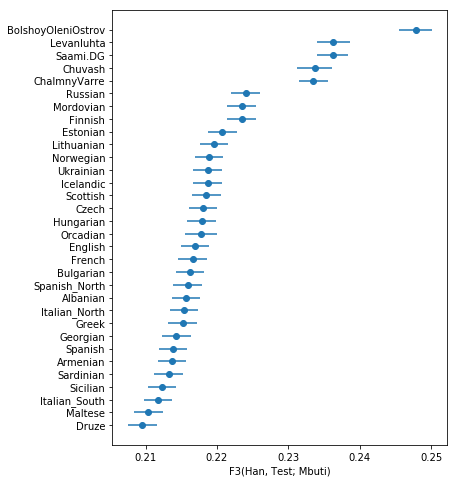

In [12]:
d_sorted = d.sort_values(by="F3")
y = range(len(d_sorted))
plt.figure(figsize=(6, 8))
plt.errorbar(d_sorted["F3"], y, xerr=d["StdErr"], fmt='o')
plt.yticks(y, d_sorted["B"]);
plt.xlabel("F3(Han, Test; Mbuti)");

As expected, the ancient samples and modern Saami are the ones with the highest allele sharing with present-day East Asians (as represented by Han) compared to many other Europeans.

## Outgroup F3 Statistics Biplot

The above plot shows an intriguing cline of differential relatedness to Han in many Europeans. For example, would you have guessed that Icelandics are closer to Han than Armenians are to Han? This is very surprising, and it shows that European ancestry has a complex relationship to East Asians. To understand this better, you can read [Patterson 2012](http://www.genetics.org/content/early/2012/09/06/genetics.112.145037), who makes some intriguing observations. Patterson and colleagues use Admixture F3 statistics and apply it to many populations world-wide. They summarise some population triples with the most negative F3 statistics in the following table:

<img src="img/Patterson_2012_table.png" alt="Patterson 2012 table" style="width: 450px;"/>

There are many interesting results here, but one of the most striking one is the finding of F3(Sardinian, Karitiana; French), which is highly significantly negative. This statistics implies that French are admixed between Sardinians and Karitiana, a Native American population from Brazil. How is that possible? We can of course rule out any recent Native American backflow into Europe.

Patterson and colleagues explained this finding with hypothesising an ancient admixture event, from a Siberian population that contributed to both Europeans and to Native Americans. They termed that population the “Ancient North Eurasians (ANE)”. The following admixture graph was suggested:

<img src="img/Patterson_2012_ANEfig.png" alt="Patterson 2012 ANE graph" style="width: 600px;"/>

As you can see, the idea is that modern Central Europeans, such as French, are admixed between Southern Europeans (Sardinians) and ANE. The Ancient North Eurasians are a classic example for a “Ghost” population, a population which does not exist anymore in unmixed form, and from which we have no direct individual representative.

Amazingly, two years after the publication of [Patterson 2012](http://www.genetics.org/content/early/2012/09/06/genetics.112.145037), the ANE ghost population was actually found: [Raghavan et al.](https://www.nature.com/articles/nature12736) and colleagues, in 2014, published a paper called “Upper Palaeolithic Siberian genome reveals dual ancestry of Native Americans”. A 24,000 year old boy (called MA1) from the site of “Mal’ta” in Siberia was shown to have close genetic affinity with both Europeans and in particular Native Americans, just as proposed in [Patterson 2012](http://www.genetics.org/content/early/2012/09/06/genetics.112.145037).

The affinities are summarised nicely in this figure from [Raghavan et al.](https://www.nature.com/articles/nature12736):

<img src="img/MA1_affinities.png" alt="MA1 Affinities" style="width: 600px;"/>

OK, so we now know that ancestry related to Native Americans contributed to European countries. Could that possibly explain the affinity of our ancient samples and Saami to Han Chinese in some way? To test this, we will run the same Outgroup F3 statistics as above, but this time not with Han but with MA1 as test population. Specifically, we run the following population triples in `qp3Pop`:

	MA1 Chuvash Mbuti
	MA1 Albanian Mbuti
	MA1 Armenian Mbuti
	MA1 Bulgarian Mbuti
	MA1 Czech Mbuti
	MA1 Druze Mbuti
	MA1 English Mbuti
	MA1 Estonian Mbuti
	MA1 Finnish Mbuti
	MA1 French Mbuti
	MA1 Georgian Mbuti
	MA1 Greek Mbuti
	MA1 Hungarian Mbuti
	MA1 Icelandic Mbuti
	MA1 Italian_North Mbuti
	MA1 Italian_South Mbuti
	MA1 Lithuanian Mbuti
	MA1 Maltese Mbuti
	MA1 Mordovian Mbuti
	MA1 Norwegian Mbuti
	MA1 Orcadian Mbuti
	MA1 Russian Mbuti
	MA1 Sardinian Mbuti
	MA1 Scottish Mbuti
	MA1 Sicilian Mbuti
	MA1 Spanish_North Mbuti
	MA1 Spanish Mbuti
	MA1 Ukrainian Mbuti
	MA1 Levanluhta Mbuti
	MA1 BolshoyOleniOstrov Mbuti
	MA1 ChalmnyVarre Mbuti
	MA1 Saami.DG Mbuti

***Exercise:*** Follow the same protocol as above: Copy the list into a file, prepare a parameter file for `qp3Pop` with that population triple list, and run `qp3Pop`. Copy the results (all lines beginning with “results:”) into a file, named "f3_outgroup_stats_Han.txt"

To test in what way the relationship to Han Chinese is correlated with the relationship with MA1, we will now plot the two statistics against each other in a scatter plot. We first have to merge the two outgroup-F3 datasets together. Here is the code including loading (assuming that the two F3 dataframes are called `outgroupf3dat_Han` and `outgroupf3dat_MA1`):